In [1]:
import spike.spike_analysis.decoders as decoder
import spike.spike_analysis.pca_trajectories as pca_t
import pickle
import numpy as np
from importlib import reload
reload(pca_t)
reload(decoder)
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\megha\anaconda3\envs\ephys_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\megha\anaconda3\envs\ephys_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
 

AttributeError: _ARRAY_API not found

In [34]:
cagemate_collection = unpickle_this('cagemate_collection.pkl')
novel_collection = unpickle_this('novel_collection.pkl')

cagemate_collection.analyze(timebin = 50, ignore_freq=0.5)
novel_collection.analyze(timebin = 50, ignore_freq=0.5)

All set to analyze
All set to analyze


In [48]:
%pwd

'c:\\Users\\megha\\Documents\\GitHub\\diff_fam_social_memory_ephys'

In [35]:
cagemate_collection.collection[0].event_dict.keys()

dict_keys(['baseline', 'exp1', 'exp2', 'exp3', 'exp4', 'exp5'])

In [36]:
pre_window = 1
event_length = 3
num_folds = 5
min_neurons = 5

cagemate_results_1v4 = decoder.trial_decoder(cagemate_collection, num_folds, 35, events = ['exp1', 'exp4'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
cagemate_results_1v5 = decoder.trial_decoder(cagemate_collection, num_folds, 34, events = ['exp1', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
cagemate_results_4v5 = decoder.trial_decoder(cagemate_collection, num_folds, 35, events = ['exp4', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)

novel_results_1v4 = decoder.trial_decoder(novel_collection, num_folds, 35, events = ['exp1', 'exp4'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
novel_results_1v5 = decoder.trial_decoder(novel_collection, num_folds, 33, events = ['exp1', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
novel_results_4v5 = decoder.trial_decoder(novel_collection, num_folds, 45, events = ['exp4', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)


In [41]:

pc_result_15 = pca_t.avg_trajectories_pca(cagemate_collection, event_length = event_length, pre_window = pre_window, events = ['exp1', 'exp5'], min_neurons = min_neurons, plot = False)
print(pc_result_15)
pc_result_14 = pca_t.avg_trajectories_pca(cagemate_collection, event_length = event_length, pre_window = pre_window, events = ['exp1', 'exp4'], min_neurons = min_neurons, plot = False)
print("")
print(pc_result_14)
pc_result_45 = pca_t.avg_trajectories_pca(cagemate_collection, event_length = event_length, pre_window = pre_window, events = ['exp4', 'exp5'], min_neurons = min_neurons, plot = False)
print("")
print(pc_result_45)

PCA Result with:
Events: exp1, exp5
Timebins per event: 80.0
Total neurons: 131
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 34

PCA Result with:
Events: exp1, exp4
Timebins per event: 80.0
Total neurons: 131
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 35

PCA Result with:
Events: exp4, exp5
Timebins per event: 80.0
Total neurons: 131
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 35


In [42]:

pc_result_15 = pca_t.avg_trajectories_pca(novel_collection, event_length = event_length, pre_window = pre_window, events = ['exp1', 'exp5'], min_neurons = min_neurons, plot = False)
print(pc_result_15)
pc_result_14 = pca_t.avg_trajectories_pca(novel_collection, event_length = event_length, pre_window = pre_window, events = ['exp1', 'exp4'], min_neurons = min_neurons, plot = False)
print("")
print(pc_result_14)
pc_result_45 = pca_t.avg_trajectories_pca(novel_collection, event_length = event_length, pre_window = pre_window, events = ['exp4', 'exp5'], min_neurons = min_neurons, plot = False)
print("")
print(pc_result_45)

PCA Result with:
Events: exp1, exp5
Timebins per event: 80.0
Total neurons: 130
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 33

PCA Result with:
Events: exp1, exp4
Timebins per event: 80.0
Total neurons: 130
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 35

PCA Result with:
Events: exp4, exp5
Timebins per event: 80.0
Total neurons: 130
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 45


c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator BaggingClassifier from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


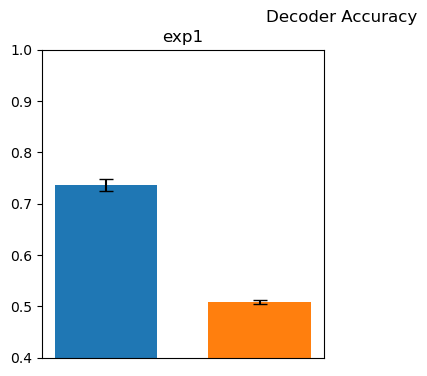

In [4]:

novel_results_1v4 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\novel_results_1v4.pkl')
novel_results_1v4.plot_average()
